The pushshift API returns 100 submissions per request. For the POC I sent 5 requests to get the newest 500 submissions.

In [95]:
import requests
import time
import pandas as pd
import praw

In [96]:
def get_pushift_data():
    before = int(time.time()) #the time now
    df = pd.DataFrame() 
    for x in range(5):
        request = 'https://api.pushshift.io/reddit/search/submission/?subreddit=NoStupidQuestions&before='+str(before)+'&size=100'
        print(request)
        r = requests.get(request)
        json = r.json()
        data = json['data']
        df2 = pd.DataFrame(data) 
        df = df.append(df2,ignore_index=True)
        print(df.tail())
        before = df2.at[99,'created_utc']
    return df    

In [97]:
pushift_data_df = get_pushift_data()

https://api.pushshift.io/reddit/search/submission/?subreddit=NoStupidQuestions&before=1607538626&size=100
   all_awardings  allow_live_comments           author author_flair_css_class  \
95            []                False     dalla_dallaa                   None   
96            []                False       TheEpicZay                   None   
97            []                False  silver-chariot2                   None   
98            []                False   philipjfry1578                   None   
99            []                False   BushDidTheMain                   None   

   author_flair_richtext author_flair_text author_flair_type author_fullname  \
95                    []              None              text     t2_7y3viinh   
96                    []              None              text        t2_thxn3   
97                    []              None              text     t2_44uq8yvo   
98                    []              None              text      t2_aakmxow   
99     

    all_awardings  allow_live_comments               author  \
395            []                False  reddithowdoesitwork   
396            []                False              IamTUNA   
397            []                False         monkeykeymon   
398            []                False         monkeykeymon   
399            []                False      crooked_scalpel   

    author_flair_css_class author_flair_richtext author_flair_text  \
395                   None                    []              None   
396                   None                    []              None   
397                   None                    []              None   
398                   None                    []              None   
399                   None                    []              None   

    author_flair_type author_fullname author_patreon_flair author_premium  \
395              text     t2_92tpudmb                False          False   
396              text        t2_givkq         

In [16]:
pushift_data_df.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,whitelist_status,wls,author_flair_background_color,author_flair_text_color,removed_by_category,author_flair_template_id,post_hint,preview,banned_by,author_cakeday
0,[],False,yunikosensei666,None,[],None,text,t2_l023f,False,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Smellyjojo,None,[],None,text,t2_44m24my2,False,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,PrashantThapliyal,None,[],None,text,t2_2lgk5m01,False,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,Rudy-Ellen,None,[],None,text,t2_1tgz9i82,False,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,leon-the-man,None,[],None,text,t2_98dox5qn,False,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
pushift_data_df.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'awarders', 'can_mod_post', 'contest_mode',
       'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_subscribers',
       'subreddit_type', 'thumbnail', 'title', 'total_awards_received',
       'treatment_tags', 'upvote_ratio',

In [99]:
id_column = pushift_data_df['id']

In [100]:
import praw
reddit = praw.Reddit(client_id='xxxxxxxxx',
                     client_secret='xxxxxxxxx',
                     password='xxxxxxxxx',
                     username='xxxxxxxxx',
                     user_agent='xxxxxxxxx')

In [101]:
# get most updated submission score and votes

In [102]:
def get_praw_data(id_column):
    df = pd.DataFrame(columns=['id', 'score', 'upvote_ratio','num_comments'])
    for index, value in id_column.items():
        submission = reddit.submission(id=value)
        score = submission.score
        upvotes = submission.ups
        downvotes = submission.downs
        upvote_ratio = submission.upvote_ratio
        num_comments = submission.num_comments
        title = submission.title
        entry = {'id':value, 'title':title, 'score':score, 'upvote_ratio':upvote_ratio, 'num_comments':num_comments, 'ups':upvotes,'downs':downvotes}
        df = df.append(entry, ignore_index=True)
    return df    

In [103]:
praw_data_df = get_praw_data(id_column)

In [104]:
praw_data_df.head()

,id,score,upvote_ratio,num_comments,downs,title,ups
0,k9xho2,2,1.0,0,0.0,Why is Arial 11 considered the default Normal ...,2.0
1,k9xh2v,0,0.5,5,0.0,Why do people judging slave owners from past e...,0.0
2,k9xgyu,0,0.4,2,0.0,Does anybody get very very uncomfortable when ...,0.0
3,k9xfkx,1,1.0,5,0.0,What if 2 people against each other in court h...,1.0
4,k9xfcw,1,1.0,4,0.0,All my muscles atrophied since I’ve been out o...,1.0


In [105]:
praw_data_df.shape

(500, 7)

In [106]:
praw_data_df['title_length'] = praw_data_df['title'].apply(lambda x: len(x.split()))

In [107]:
praw_data_df.columns

Index(['id', 'score', 'upvote_ratio', 'num_comments', 'downs', 'title', 'ups',
       'title_length'],
      dtype='object')

<AxesSubplot:xlabel='title_length', ylabel='score'>

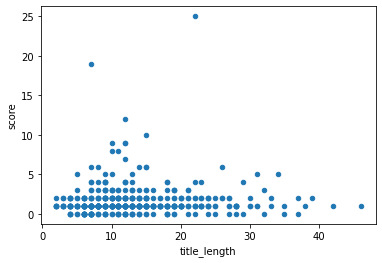

In [108]:
praw_data_df.plot.scatter(x='title_length', y='score')

<AxesSubplot:xlabel='title_length', ylabel='upvote_ratio'>

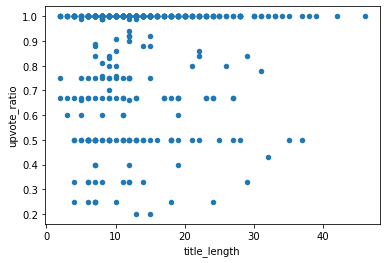

In [109]:
praw_data_df.plot.scatter(x='title_length', y='upvote_ratio')

<AxesSubplot:xlabel='title_length', ylabel='upvote_ratio'>

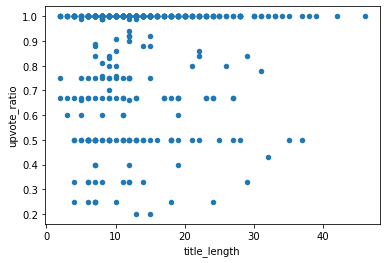

In [110]:
praw_data_df.plot.scatter(x='title_length', y='upvote_ratio')

In [111]:
praw_data_df['score'].describe()

count     500
unique     14
top         1
freq      262
Name: score, dtype: int64

In [112]:
praw_data_df['upvote_ratio'].describe()

count    500.000000
mean       0.878780
std        0.211625
min        0.200000
25%        0.795000
50%        1.000000
75%        1.000000
max        1.000000
Name: upvote_ratio, dtype: float64

In [113]:
praw_data_df['num_comments'].describe()

count     500
unique     24
top         1
freq       82
Name: num_comments, dtype: int64

In [114]:
praw_data_df['title_length'].describe()

count    500.00000
mean      13.14400
std        7.32356
min        2.00000
25%        8.00000
50%       12.00000
75%       17.00000
max       46.00000
Name: title_length, dtype: float64

In [115]:
pushift_data_df.at[0,'id']

'k9xho2'

In [116]:
submission = reddit.submission(id='k9u8pw')

In [117]:
dir(submission)

['STR_FIELD',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chunk',
 '_comments_by_id',
 '_fetch',
 '_fetch_data',
 '_fetch_info',
 '_fetched',
 '_kind',
 '_reddit',
 '_reset_attributes',
 '_safely_add_arguments',
 '_url_parts',
 '_vote',
 'clear_vote',
 'comment_limit',
 'comment_sort',
 'comments',
 'crosspost',
 'delete',
 'disable_inbox_replies',
 'downvote',
 'duplicates',
 'edit',
 'enable_inbox_replies',
 'flair',
 'fullname',
 'gild',
 'hide',
 'id',
 'id_from_url',
 'mark_visited',
 'mod',
 'parse',
 'reply',
 'report',
 'save',
 'shortlink',
 'unhide',
 'unsave',
 'upvote']